# Model for Nature Conservancy Fisheries Kaggle Competition

#### Dependencies

In [1]:
import fish_data as fd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import json

#### Helper functions

In [2]:
help(fd)

Help on module fish_data:

NAME
    fish_data

DESCRIPTION
    fish_data module contains the helper functions for the model build of the
    Nature Conservancy Fisheries Kaggle Competition.
    
    Dependencies:
        * numpy as np
        * os
        * scipy.ndimage as ndimage
        * scipy.misc as misc
        * scipy.special as special
        * matplotlib.pyplot as plt
        * tensorflow as tf

FUNCTIONS
    count_nodes(x, y, kernel, stride, conv_depth, pad='SAME')
        Calculates the number of total nodes present in the next layer of a
        convolution OR max_pooling event.
    
    decode_image(image_name, size, num_channels=3, mean_channel_vals=[155.0, 155.0, 155.0], mutate=False, crop='random', crop_size=224)
        Converts a dequeued image read from filename to a single tensor array,
        with modifications:
            * smallest dimension resized to standard height and width supplied in size param
            * each channel centered to mean near zero.  Dev

#### Generate a list of filenames

In [3]:
fish_filenames = fd.generate_filenames_list('data/train/', subfolders = True)
print("There are {} filenames in the master set list".format(len(fish_filenames)))
test_filenames = fd.generate_filenames_list('data/test_stg1/', subfolders = False)
print("There are {} filenames in the test set list".format(len(test_filenames)))

There are 3777 filenames in the master set list
There are 1000 filenames in the test set list


#### Generate the labels for the master set list

In [4]:
fish_label_arr = fd.make_labels(fish_filenames, 'train/', '/img')
fish_label_arr.shape
print("One-hot labels generated correctly: {}".format(all(np.sum(fish_label_arr, 0) == [1719, 200, 117, 67, 465, 299, 176, 734]) ))

One-hot labels generated correctly: True


In [6]:
valid_size = 250
files_train, files_val, y_train, y_val = train_test_split(fish_filenames, fish_label_arr, test_size = valid_size)
print("Validation set size: {}".format(y_val.shape[0]))
print("Training set size: {}".format(y_train.shape[0]))

Validation set size: 250
Training set size: 3527


In [7]:
files_train, y_train = fd.generate_balanced_filenames_epoch(files_train, y_train, shuffle = True)

Fish counts: [1598  191  113   67  433  278  169  678]
New fish counts: [1598 1598 1598 1598 1598 1598 1598 1598]


#### Shuffle and split the master set list into training and validation sets

In [11]:
val_data, val_labels = fd.process_batch(files_val, y_val, offset = 0, batch_size = valid_size, 
                        std_size = 256, crop_size = 224, crop_mode = 'centre', normalize = 'custom', 
                        pixel_offset = 98.0, pixel_factor = 120.0,
                        mutation = False, verbose = True)

Batch shape: (250, 224, 224, 3)
Mean pixel value: 0.005666 +/- 0.466
Batch label counts: [121   9   4   0  32  21   7  56]
Batch set is 150.528 Mb


In [12]:
example_batch, example_labels = fd.process_batch(files_train, y_train, offset = 0, batch_size = 5, 
                        std_size = 256, crop_size = 224, crop_mode = 'random', normalize = None, 
                        pixel_offset = 98.0, pixel_factor = 120.0,
                        mutation = True, verbose = True)

Batch shape: (5, 224, 224, 3)
Mean pixel value: 94.69 +/- 56.3
Batch label counts: [0 1 1 0 0 1 1 1]
Batch set is 3.01056 Mb


Fish Label: 5


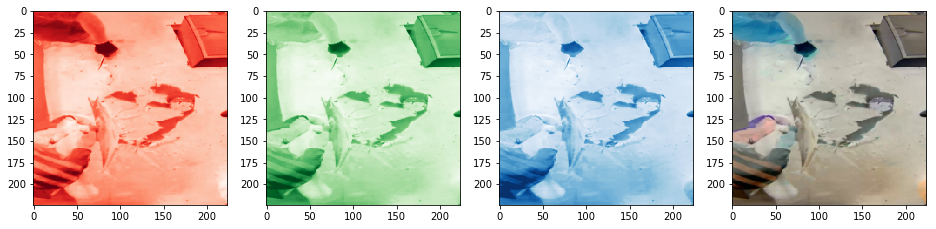

Fish Label: 2


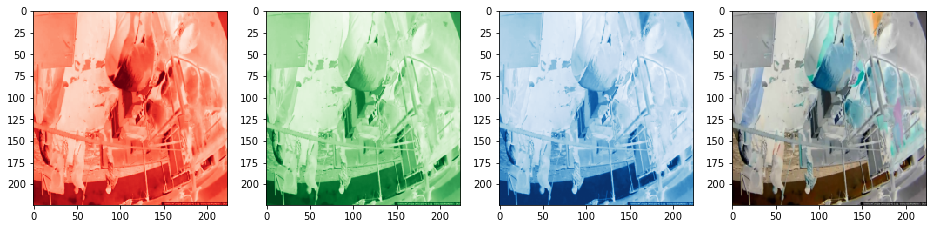

Fish Label: 6


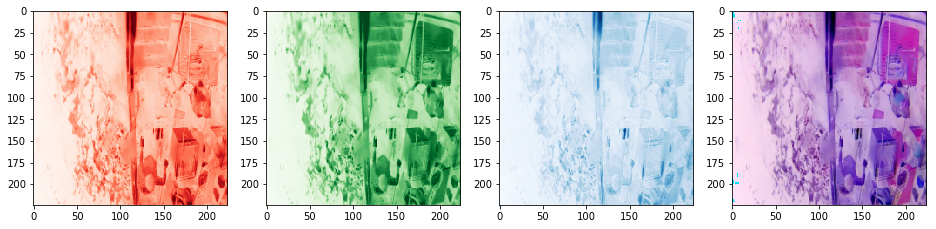

Fish Label: 7


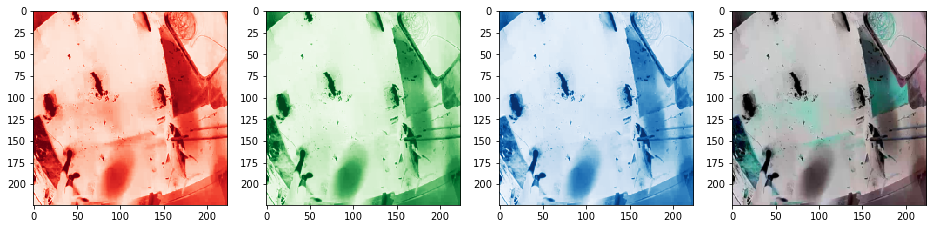

Fish Label: 1


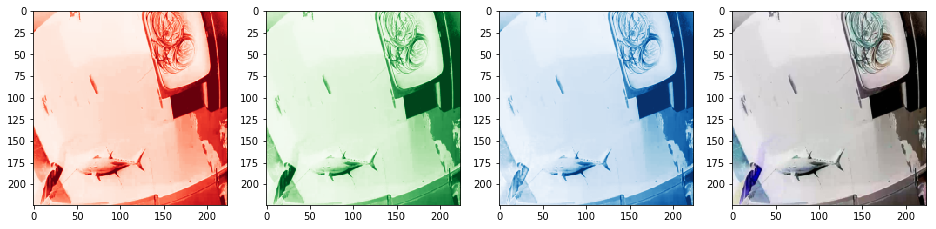

In [13]:
for x in range(5):
    print("Fish Label: {}".format(np.argmax(example_labels[x,:],0)))
    fd.show_panel(example_batch[x,:,:,:])

## Graph and Session Runs

#### Graph parameters

In [ ]:
%run -i 'PARAMETERS.py'

#### Session parameters

In [ ]:
version_ID = 'v2.2.1.0'

**Note on version_ID:** First digit refers to overall architecture.  Second digit refers to runs where the outputs are comparable (summaries are the same, etc).  Third digit refers to significant parameter or activation changes (e.g. depths of layers, types of activation).  Fourth digit refers to minor parameter changes (e.g. learning rate).  (All in theory)


In [ ]:
%run -i 'GRAPH.py'

In [ ]:
%run -i 'SESSION.py'